In [1]:
import numpy as np
import pandas as pd
import random
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from folium import plugins

<b> Passos para a elaboração do Projeto: </b>

- Descobri qual segmento é mais lucrativo. 
- Transformar os dados categóricos em dados números (apenas os que forem ser utilizados e que façam sentido para o modelo)
- Gerar um modelo para prever a probabilidade dos clientes responderem aos catálogos e dessa forma estimar as vendas médias. 
- Descontar a margem e os gastos por cada catálogo para verificar se ainda é viavél financeiramente fazer o investimento. 


In [2]:
df = pd.read_excel('p1-customers.xlsx', sheet_name=0, header=0)
df

,Name,Customer_Segment,Customer_ID,Address,City,State,ZIP,Avg_Sale_Amount,Store_Number,Responded_to_Last_Catalog,Avg_Num_Products_Purchased,#_Years_as_Customer
0,Pamela Wright,Store Mailing List,2,376 S Jasmine St,Denver,CO,80224,227.90,100,No,1,6
1,Danell Valdez,Store Mailing List,7,12066 E Lake Cir,Greenwood Village,CO,80111,55.00,105,Yes,1,6
2,Jessica Rinehart,Store Mailing List,8,7225 S Gaylord St,Centennial,CO,80122,212.57,101,No,1,3
3,Nancy Clark,Store Mailing List,9,4497 Cornish Way,Denver,CO,80239,195.31,105,Yes,1,6
4,Andrea Brun,Store Mailing List,10,2316 E 5th Ave,Denver,CO,80206,110.55,100,Yes,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
2370,Joan Delisa,Credit Card Only,3287,1657 S King St,Denver,CO,80219,818.72,101,No,5,1
2371,Helen Cordiner,Credit Card Only,3299,2102 S Lansing Ct,Aurora,CO,80014,564.93,105,No,6,4
2372,Angela Finley,Credit Card Only,3303,1068 S Jasper St,Aurora,CO,80017,605.07,105,No,6,4
2373,Christine Sullivan,Credit Card Only,3304,7901 W 52nd Ave,Arvada,CO,80002,656.79,107,No,7,7


Como podemos ver, é um dataframe que nos traz vários tipos de dados que devem ser utilizados para trazer vários insights interessantes. Vamos fazer isso na Análise Exploratória dos Dados. 

Muitos dados são interessantes avaliarmos gráficamente, porém não terá um impacto para a construção do modelo. 

Dados como nome dos clientes, endereço, Estado, Cep, Número da Loja, não vejo relação direta com os produtos do catálogo. Mesmo assim não vamos excluir num primeiro momento. Vamos analisar estatísticamente se tem um nível de 95% de confiança estatística. Caso tenha, podemos testar essa variável dentro do modelo. 


In [3]:
df.isnull().sum()

Name                          0
Customer_Segment              0
Customer_ID                   0
Address                       0
City                          0
State                         0
ZIP                           0
Avg_Sale_Amount               0
Store_Number                  0
Responded_to_Last_Catalog     0
Avg_Num_Products_Purchased    0
#_Years_as_Customer           0
dtype: int64

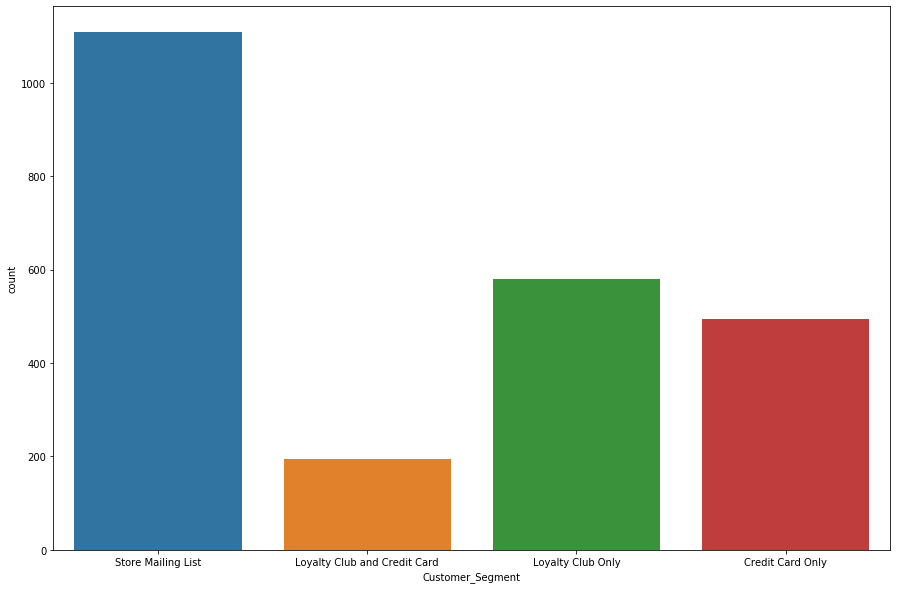

In [4]:
plt.figure(figsize=(15, 10))
sns.countplot(x="Customer_Segment",data=df)


In [5]:
df['Customer_Segment'].value_counts()

Store Mailing List              1108
Loyalty Club Only                579
Credit Card Only                 494
Loyalty Club and Credit Card     194
Name: Customer_Segment, dtype: int64

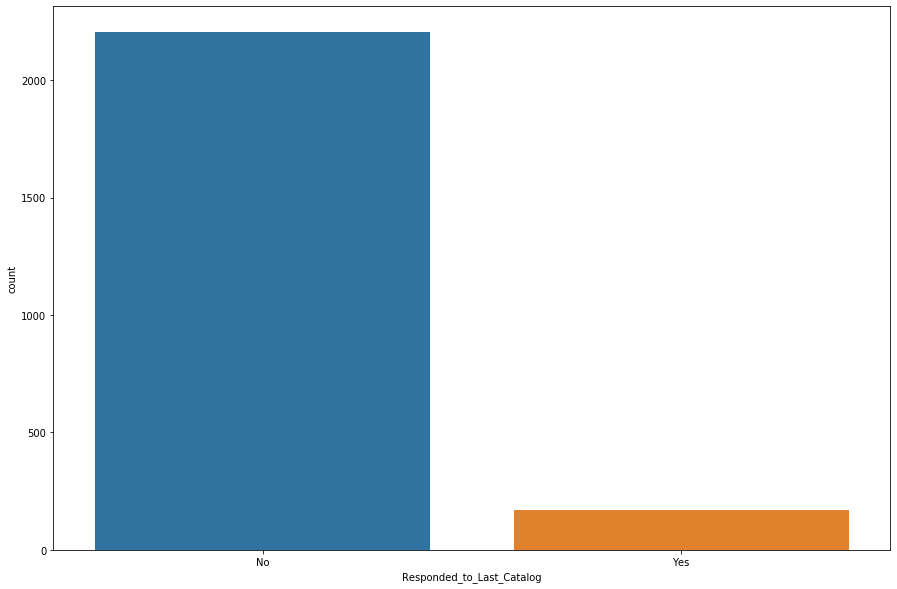

In [6]:
plt.figure(figsize=(15, 10))
sns.countplot(x="Responded_to_Last_Catalog",data=df)

In [7]:
df['Responded_to_Last_Catalog'].value_counts()

No     2204
Yes     171
Name: Responded_to_Last_Catalog, dtype: int64

In [8]:
Responded_to_Last_Catalog = {
    "Yes": 1,
    "No": 0,
}

In [9]:
df.replace(Responded_to_Last_Catalog,inplace=True)
df

,Name,Customer_Segment,Customer_ID,Address,City,State,ZIP,Avg_Sale_Amount,Store_Number,Responded_to_Last_Catalog,Avg_Num_Products_Purchased,#_Years_as_Customer
0,Pamela Wright,Store Mailing List,2,376 S Jasmine St,Denver,CO,80224,227.90,100,0,1,6
1,Danell Valdez,Store Mailing List,7,12066 E Lake Cir,Greenwood Village,CO,80111,55.00,105,1,1,6
2,Jessica Rinehart,Store Mailing List,8,7225 S Gaylord St,Centennial,CO,80122,212.57,101,0,1,3
3,Nancy Clark,Store Mailing List,9,4497 Cornish Way,Denver,CO,80239,195.31,105,1,1,6
4,Andrea Brun,Store Mailing List,10,2316 E 5th Ave,Denver,CO,80206,110.55,100,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
2370,Joan Delisa,Credit Card Only,3287,1657 S King St,Denver,CO,80219,818.72,101,0,5,1
2371,Helen Cordiner,Credit Card Only,3299,2102 S Lansing Ct,Aurora,CO,80014,564.93,105,0,6,4
2372,Angela Finley,Credit Card Only,3303,1068 S Jasper St,Aurora,CO,80017,605.07,105,0,6,4
2373,Christine Sullivan,Credit Card Only,3304,7901 W 52nd Ave,Arvada,CO,80002,656.79,107,0,7,7


In [10]:
df1 = pd.read_excel('p1-customers.xlsx', sheet_name=0, header=0)
df1

,Name,Customer_Segment,Customer_ID,Address,City,State,ZIP,Avg_Sale_Amount,Store_Number,Responded_to_Last_Catalog,Avg_Num_Products_Purchased,#_Years_as_Customer
0,Pamela Wright,Store Mailing List,2,376 S Jasmine St,Denver,CO,80224,227.90,100,No,1,6
1,Danell Valdez,Store Mailing List,7,12066 E Lake Cir,Greenwood Village,CO,80111,55.00,105,Yes,1,6
2,Jessica Rinehart,Store Mailing List,8,7225 S Gaylord St,Centennial,CO,80122,212.57,101,No,1,3
3,Nancy Clark,Store Mailing List,9,4497 Cornish Way,Denver,CO,80239,195.31,105,Yes,1,6
4,Andrea Brun,Store Mailing List,10,2316 E 5th Ave,Denver,CO,80206,110.55,100,Yes,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
2370,Joan Delisa,Credit Card Only,3287,1657 S King St,Denver,CO,80219,818.72,101,No,5,1
2371,Helen Cordiner,Credit Card Only,3299,2102 S Lansing Ct,Aurora,CO,80014,564.93,105,No,6,4
2372,Angela Finley,Credit Card Only,3303,1068 S Jasper St,Aurora,CO,80017,605.07,105,No,6,4
2373,Christine Sullivan,Credit Card Only,3304,7901 W 52nd Ave,Arvada,CO,80002,656.79,107,No,7,7


In [11]:
codigo_segmento_loja = {
    "Store Mailing List": 4,
    "Loyalty Club Only": 3,
    "Credit Card Only": 2,
    "Loyalty Club and Credit Card": 1
}

In [12]:
df.replace(codigo_segmento_loja,inplace=True)
df

,Name,Customer_Segment,Customer_ID,Address,City,State,ZIP,Avg_Sale_Amount,Store_Number,Responded_to_Last_Catalog,Avg_Num_Products_Purchased,#_Years_as_Customer
0,Pamela Wright,4,2,376 S Jasmine St,Denver,CO,80224,227.90,100,0,1,6
1,Danell Valdez,4,7,12066 E Lake Cir,Greenwood Village,CO,80111,55.00,105,1,1,6
2,Jessica Rinehart,4,8,7225 S Gaylord St,Centennial,CO,80122,212.57,101,0,1,3
3,Nancy Clark,4,9,4497 Cornish Way,Denver,CO,80239,195.31,105,1,1,6
4,Andrea Brun,4,10,2316 E 5th Ave,Denver,CO,80206,110.55,100,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
2370,Joan Delisa,2,3287,1657 S King St,Denver,CO,80219,818.72,101,0,5,1
2371,Helen Cordiner,2,3299,2102 S Lansing Ct,Aurora,CO,80014,564.93,105,0,6,4
2372,Angela Finley,2,3303,1068 S Jasper St,Aurora,CO,80017,605.07,105,0,6,4
2373,Christine Sullivan,2,3304,7901 W 52nd Ave,Arvada,CO,80002,656.79,107,0,7,7


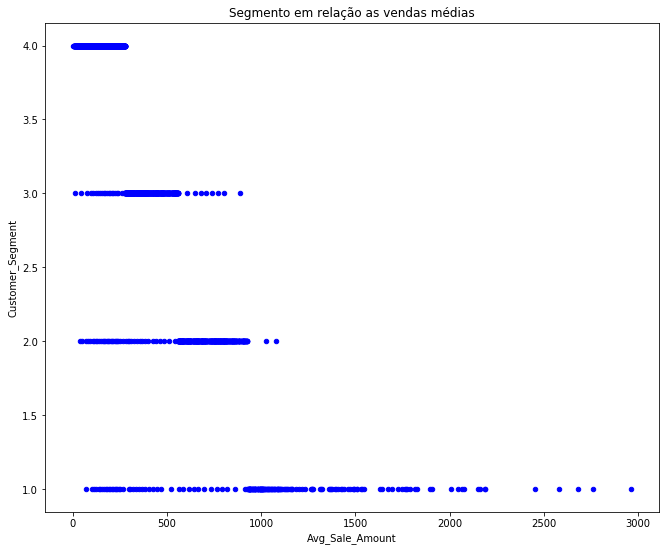

In [13]:
df.plot(x='Avg_Sale_Amount',y='Customer_Segment',kind='scatter', title='Segmento em relação as vendas médias',color='b',figsize=(11,9))

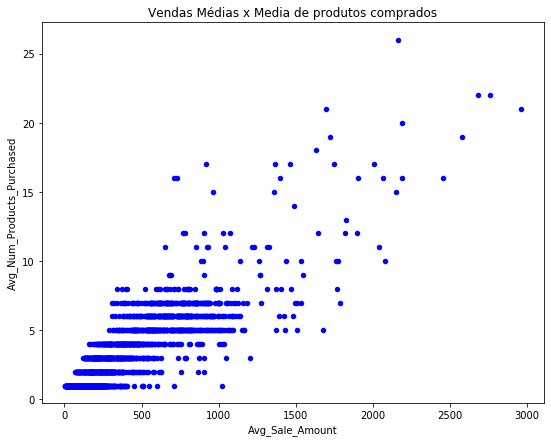

In [14]:
df.plot(x='Avg_Sale_Amount',y='Avg_Num_Products_Purchased',kind='scatter', title='Vendas Médias x Media de produtos comprados',color='b',figsize=(9,7))

<Figure size 1296x1080 with 0 Axes>

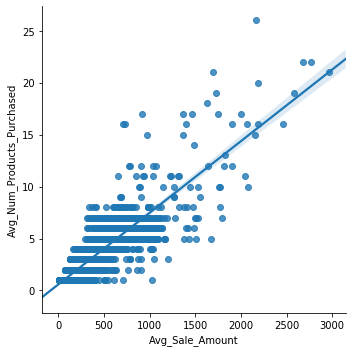

In [15]:
plt.figure(figsize=(18, 15))
sns.lmplot(x='Avg_Sale_Amount',y='Avg_Num_Products_Purchased',data=df)

<Figure size 1296x1080 with 0 Axes>

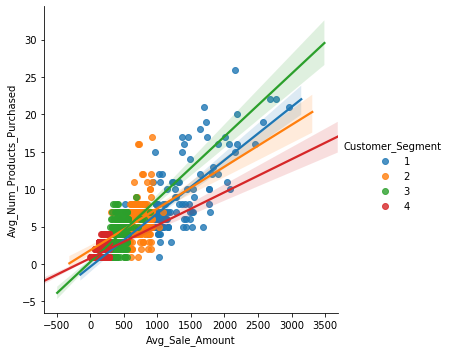

In [16]:
plt.figure(figsize=(18, 15))
sns.lmplot(x='Avg_Sale_Amount',y='Avg_Num_Products_Purchased',data=df, hue='Customer_Segment')

In [17]:
df['Customer_Segment'].value_counts()

4    1108
3     579
2     494
1     194
Name: Customer_Segment, dtype: int64

<Figure size 1296x1080 with 0 Axes>

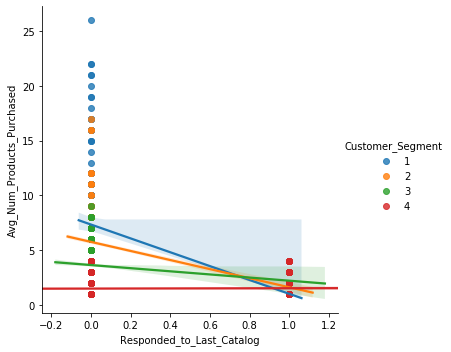

In [18]:
plt.figure(figsize=(18, 15))
sns.lmplot(x='Responded_to_Last_Catalog',y='Avg_Num_Products_Purchased',data=df, hue='Customer_Segment')

<Figure size 1296x1080 with 0 Axes>

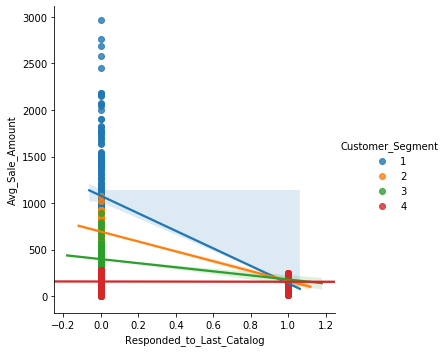

In [19]:
plt.figure(figsize=(18, 15))
sns.lmplot(x='Responded_to_Last_Catalog',y='Avg_Sale_Amount',data=df, hue='Customer_Segment')

In [21]:
df1 = pd.get_dummies(df1, columns=['Customer_Segment'], prefix=['Customer_Segment'], dtype='float64')
df1

,Name,Customer_ID,Address,City,State,ZIP,Avg_Sale_Amount,Store_Number,Responded_to_Last_Catalog,Avg_Num_Products_Purchased,#_Years_as_Customer,Customer_Segment_Credit Card Only,Customer_Segment_Loyalty Club Only,Customer_Segment_Loyalty Club and Credit Card,Customer_Segment_Store Mailing List
0,Pamela Wright,2,376 S Jasmine St,Denver,CO,80224,227.90,100,No,1,6,0.0,0.0,0.0,1.0
1,Danell Valdez,7,12066 E Lake Cir,Greenwood Village,CO,80111,55.00,105,Yes,1,6,0.0,0.0,0.0,1.0
2,Jessica Rinehart,8,7225 S Gaylord St,Centennial,CO,80122,212.57,101,No,1,3,0.0,0.0,0.0,1.0
3,Nancy Clark,9,4497 Cornish Way,Denver,CO,80239,195.31,105,Yes,1,6,0.0,0.0,0.0,1.0
4,Andrea Brun,10,2316 E 5th Ave,Denver,CO,80206,110.55,100,Yes,1,2,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2370,Joan Delisa,3287,1657 S King St,Denver,CO,80219,818.72,101,No,5,1,1.0,0.0,0.0,0.0
2371,Helen Cordiner,3299,2102 S Lansing Ct,Aurora,CO,80014,564.93,105,No,6,4,1.0,0.0,0.0,0.0
2372,Angela Finley,3303,1068 S Jasper St,Aurora,CO,80017,605.07,105,No,6,4,1.0,0.0,0.0,0.0
2373,Christine Sullivan,3304,7901 W 52nd Ave,Arvada,CO,80002,656.79,107,No,7,7,1.0,0.0,0.0,0.0


In [22]:
df1.columns

Index(['Name', 'Customer_ID', 'Address', 'City', 'State', 'ZIP',
       'Avg_Sale_Amount', 'Store_Number', 'Responded_to_Last_Catalog',
       'Avg_Num_Products_Purchased', '#_Years_as_Customer',
       'Customer_Segment_Credit Card Only',
       'Customer_Segment_Loyalty Club Only',
       'Customer_Segment_Loyalty Club and Credit Card',
       'Customer_Segment_Store Mailing List'],
      dtype='object')

In [23]:
df1.dtypes

Name                                              object
Customer_ID                                        int64
Address                                           object
City                                              object
State                                             object
ZIP                                                int64
Avg_Sale_Amount                                  float64
Store_Number                                       int64
Responded_to_Last_Catalog                         object
Avg_Num_Products_Purchased                         int64
#_Years_as_Customer                                int64
Customer_Segment_Credit Card Only                float64
Customer_Segment_Loyalty Club Only               float64
Customer_Segment_Loyalty Club and Credit Card    float64
Customer_Segment_Store Mailing List              float64
dtype: object

In [24]:
import statsmodels.api as sm

In [25]:
X = df1[['Customer_Segment_Credit Card Only', 'Customer_Segment_Loyalty Club Only', 'Customer_Segment_Loyalty Club and Credit Card', 'Customer_Segment_Store Mailing List', 'Avg_Num_Products_Purchased']]
y = df1['Avg_Sale_Amount']


In [26]:
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()

est.summary()

/home/felipe/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Avg_Sale_Amount   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     3040.
Date:                Sun, 12 Apr 2020   Prob (F-statistic):               0.00
Time:                        03:34:08   Log-Likelihood:                -15061.
No. Observations:                2375   AIC:                         3.013e+04
Df Residuals:                    2370   BIC:                         3.016e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                           220.1838      6.113     36.022      0.000     208.197     232.170
Customer_Segment_Credit Card Only                83.2796      6.326     13.165      0.000      70.875      95.685
Customer_Segment_Loyalty Club Only              -66.0761      5.196    -12.716      0.000     -76.266     -55.886
Customer_Segment_Loyalty Club and Credit Card   365.1184      9.853     37.058      0.000     345.798     384.439
Customer_Segment_Store Mailing List            -162.1381      5.297    -30.610      0.000    -172.525    -151.751
Avg_Num_Products_Purchased                       66.9762      1.515     44.208      0.000      64.005      69.947
==============================================================================
Omnibus:                      359.638   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4770.580
Skew:                           0.232   Prob(JB):                         0.00
Kurtosis:                       9.928   Cond. No.                     1.42e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.3e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [37]:
dft = pd.read_excel('p1-mailinglist.xlsx', sheet_name=0, header=0)
dft

,Name,Customer_Segment,Customer_ID,Address,City,State,ZIP,Store_Number,Avg_Num_Products_Purchased,#_Years_as_Customer,Score_No,Score_Yes
0,A Giametti,Loyalty Club Only,2213,5326 S Lisbon Way,Centennial,CO,80015,105,3,0.2,0.694964,0.305036
1,Abby Pierson,Loyalty Club and Credit Card,2785,4344 W Roanoke Pl,Denver,CO,80236,101,6,0.6,0.527275,0.472725
2,Adele Hallman,Loyalty Club Only,2931,5219 S Delaware St,Englewood,CO,80110,101,7,0.9,0.421118,0.578882
3,Alejandra Baird,Loyalty Club Only,2231,2301 Lawrence St,Denver,CO,80205,103,2,0.6,0.694862,0.305138
4,Alice Dewitt,Loyalty Club Only,2530,5549 S Hannibal Way,Centennial,CO,80015,104,4,0.5,0.612294,0.387706
...,...,...,...,...,...,...,...,...,...,...,...,...
245,Wanda Stiveson,Credit Card Only,1129,13080 W Montana Dr,Lakewood,CO,80228,107,18,0.3,0.783806,0.216194
246,Wendy Crenshaw,Loyalty Club Only,304,12483 W 8th Ave,Golden,CO,80401,106,3,0.6,0.807200,0.192800
247,Wendy Renaud,Loyalty Club Only,2629,700 S Alton Way,Denver,CO,80247,100,6,0.1,0.576544,0.423456
248,Wilma Reid,Credit Card Only,1917,6763 W Yale Ave,Lakewood,CO,80227,101,7,0.2,0.740749,0.259251


In [39]:
dft = pd.get_dummies(dft, columns=['Customer_Segment'], prefix=['Customer_Segment'], dtype='float64')
dft

,Name,Customer_ID,Address,City,State,ZIP,Store_Number,Avg_Num_Products_Purchased,#_Years_as_Customer,Score_No,Score_Yes,Customer_Segment_Credit Card Only,Customer_Segment_Loyalty Club Only,Customer_Segment_Loyalty Club and Credit Card,Customer_Segment_Store Mailing List
0,A Giametti,2213,5326 S Lisbon Way,Centennial,CO,80015,105,3,0.2,0.694964,0.305036,0.0,1.0,0.0,0.0
1,Abby Pierson,2785,4344 W Roanoke Pl,Denver,CO,80236,101,6,0.6,0.527275,0.472725,0.0,0.0,1.0,0.0
2,Adele Hallman,2931,5219 S Delaware St,Englewood,CO,80110,101,7,0.9,0.421118,0.578882,0.0,1.0,0.0,0.0
3,Alejandra Baird,2231,2301 Lawrence St,Denver,CO,80205,103,2,0.6,0.694862,0.305138,0.0,1.0,0.0,0.0
4,Alice Dewitt,2530,5549 S Hannibal Way,Centennial,CO,80015,104,4,0.5,0.612294,0.387706,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,Wanda Stiveson,1129,13080 W Montana Dr,Lakewood,CO,80228,107,18,0.3,0.783806,0.216194,1.0,0.0,0.0,0.0
246,Wendy Crenshaw,304,12483 W 8th Ave,Golden,CO,80401,106,3,0.6,0.807200,0.192800,0.0,1.0,0.0,0.0
247,Wendy Renaud,2629,700 S Alton Way,Denver,CO,80247,100,6,0.1,0.576544,0.423456,0.0,1.0,0.0,0.0
248,Wilma Reid,1917,6763 W Yale Ave,Lakewood,CO,80227,101,7,0.2,0.740749,0.259251,1.0,0.0,0.0,0.0


In [43]:
dft['Project'] = 220.1838+(dft['Customer_Segment_Loyalty Club Only']*-66.0761)+(dft['Customer_Segment_Loyalty Club and Credit Card']*365.1184)+(dft['Customer_Segment_Store Mailing List']*-162.1381)+(dft['Customer_Segment_Credit Card Only']*83.2796)+(dft['Avg_Num_Products_Purchased']*66.9762)

In [46]:
dft['final'] = dft['Project']*dft['Score_Yes']
dft['final']

0      108.298784
1      466.654470
2      360.609296
3       87.898028
4      163.616717
          ...    
245    326.244172
246     68.451036
247    235.426553
248    200.218343
249    129.998853
Name: final, Length: 250, dtype: float64

In [47]:
dft['final'].sum()

47224.86485806424

In [48]:
agm = (dft['final'].sum())*0.5
agm

23612.43242903212

In [49]:
profit = agm - (6.5*250)
profit

21987.43242903212

<b> Respondendo as hipóteses: </b>

- O segmento mais lucrativo é o Loyalty Club Only (3). É a variável que tem o melhor desempenho, desde as médias de vendas mais baixas, até as mais elevadas, ou seja, é um indicativo claro que a loja deve investir principalmente nesse segmento, pois além de abranger todos os públicos de renda, é a que mais traz resultados para a empresa.
- Não foi necessário a geração de um modelo de classificação, para prever o Score, pois essa informação já nos é fornecida. Mas nada impede que fosse criado um modelo de classificação para prever essa probabilidade. 
- Após descontarmos a margem de 50%, mais 6,50 dólares por catálogo, obtivemos um lucro projetado de 21.987,43 dólares, acima dos 10.000,00 que era o valor mínimo esperado definido pela gerência. 